In [44]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasetHouse.csv')

In [47]:
dataset.columns = dataset.columns.str.strip()

In [48]:
print(dataset.head())

              Zona          Direccion  Superficie_m2  Dormitorios  Baños  \
0      Villa Adela            Calle 3            120            3      2   
1  Ciudad Satélite       Av. Satélite            180            4      2   
2      16 de Julio    Calle Principal             95            2      1   
3         Río Seco  Av. Juan Pablo II            150            3      2   
4      Santiago II            Calle 5            200            4      3   

  Garaje  Precio_USD  Cercania_Escuelas_km  Cercania_Hospitales_km  \
0     Si       75000                   0.3                     1.2   
1     Si       98000                   0.5                     0.7   
2     No       62000                   0.2                     0.9   
3     Si       82000                   0.8                     1.5   
4     Si      115000                   0.4                     1.1   

   Cercania_Teleferico_km  Edad_Propiedad_años  
0                     0.8                   15  
1                     0.

In [49]:
print(dataset.shape)
print(dataset.info())

(105, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zona                    105 non-null    object 
 1   Direccion               105 non-null    object 
 2   Superficie_m2           105 non-null    int64  
 3   Dormitorios             105 non-null    int64  
 4   Baños                   105 non-null    int64  
 5   Garaje                  105 non-null    object 
 6   Precio_USD              105 non-null    int64  
 7   Cercania_Escuelas_km    105 non-null    float64
 8   Cercania_Hospitales_km  105 non-null    float64
 9   Cercania_Teleferico_km  105 non-null    float64
 10  Edad_Propiedad_años     105 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 9.1+ KB
None


In [50]:
print(dataset.describe())

       Superficie_m2  Dormitorios       Baños     Precio_USD  \
count     105.000000   105.000000  105.000000     105.000000   
mean      147.523810     3.352381    1.942857   86923.809524   
std        29.735402     0.664787    0.676936   15565.429667   
min        95.000000     2.000000    1.000000   60000.000000   
25%       120.000000     3.000000    1.000000   74000.000000   
50%       150.000000     3.000000    2.000000   88000.000000   
75%       175.000000     4.000000    2.000000   98000.000000   
max       200.000000     4.000000    3.000000  116000.000000   

       Cercania_Escuelas_km  Cercania_Hospitales_km  Cercania_Teleferico_km  \
count            105.000000              105.000000              105.000000   
mean               0.545714                1.405714                0.870476   
std                0.193166                0.354593                0.317116   
min                0.200000                0.700000                0.200000   
25%                0.400000 

In [51]:
print(dataset.isnull().sum())

Zona                      0
Direccion                 0
Superficie_m2             0
Dormitorios               0
Baños                     0
Garaje                    0
Precio_USD                0
Cercania_Escuelas_km      0
Cercania_Hospitales_km    0
Cercania_Teleferico_km    0
Edad_Propiedad_años       0
dtype: int64


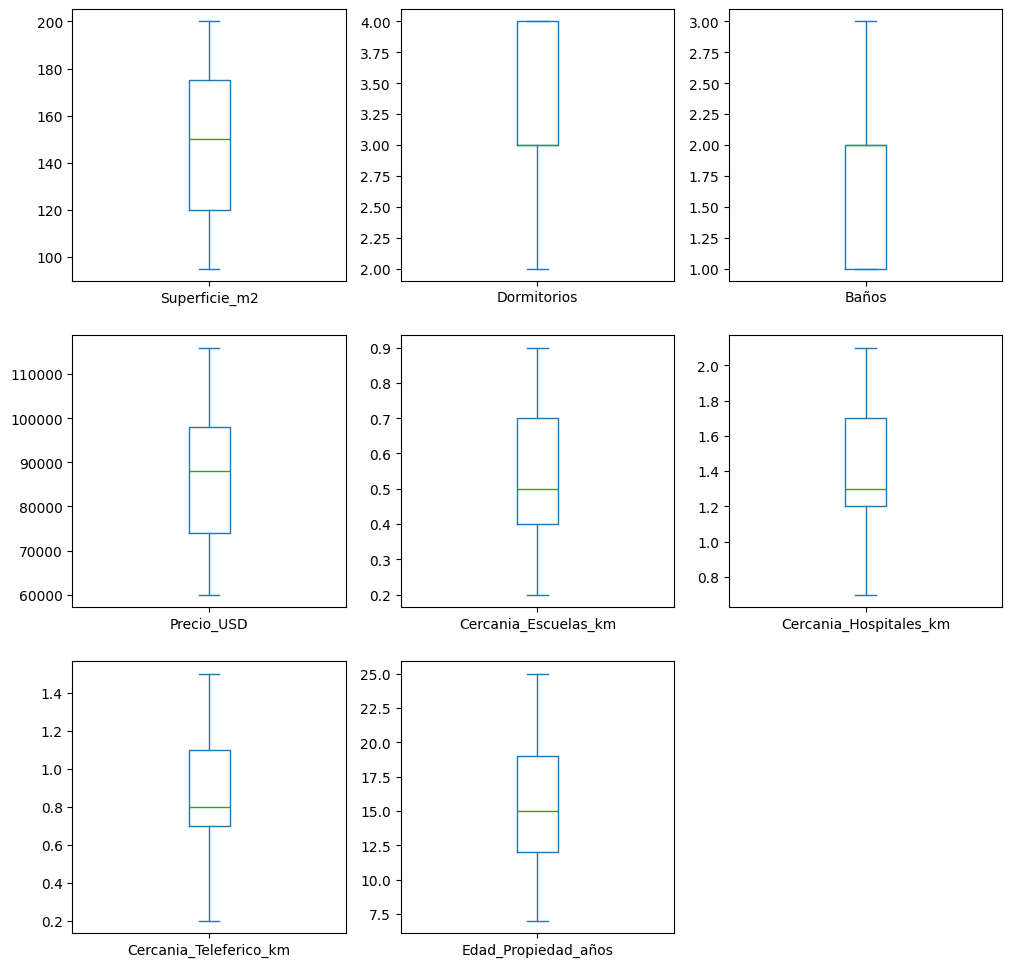

In [52]:
# Boxplot para ver la distribución de las variables
dataset.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 12), sharex=False, sharey=False)
plt.show()

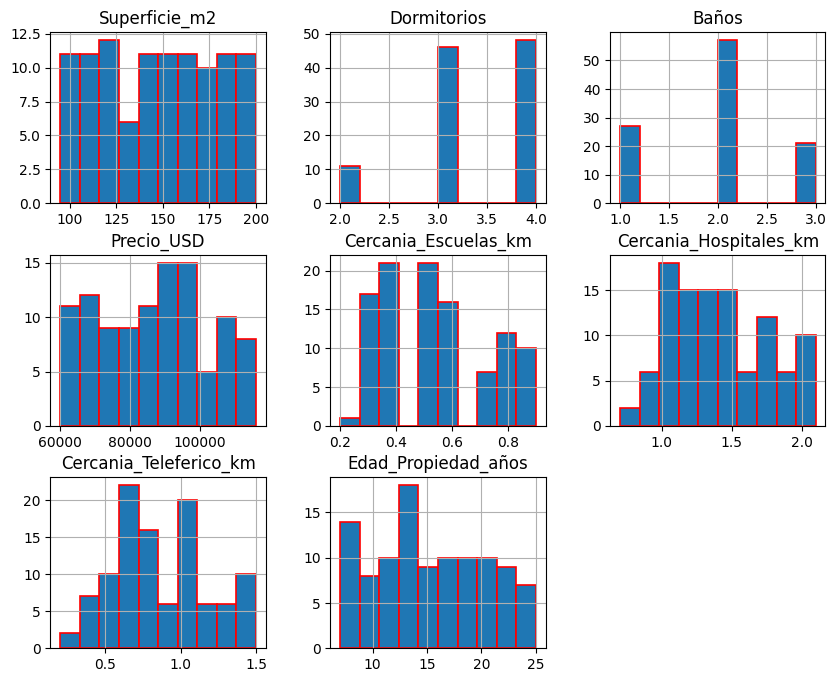

In [53]:
# Histograma para ver la distribución de cada columna
dataset.hist(edgecolor='red', linewidth=1.2, figsize=(10, 8))
plt.show()

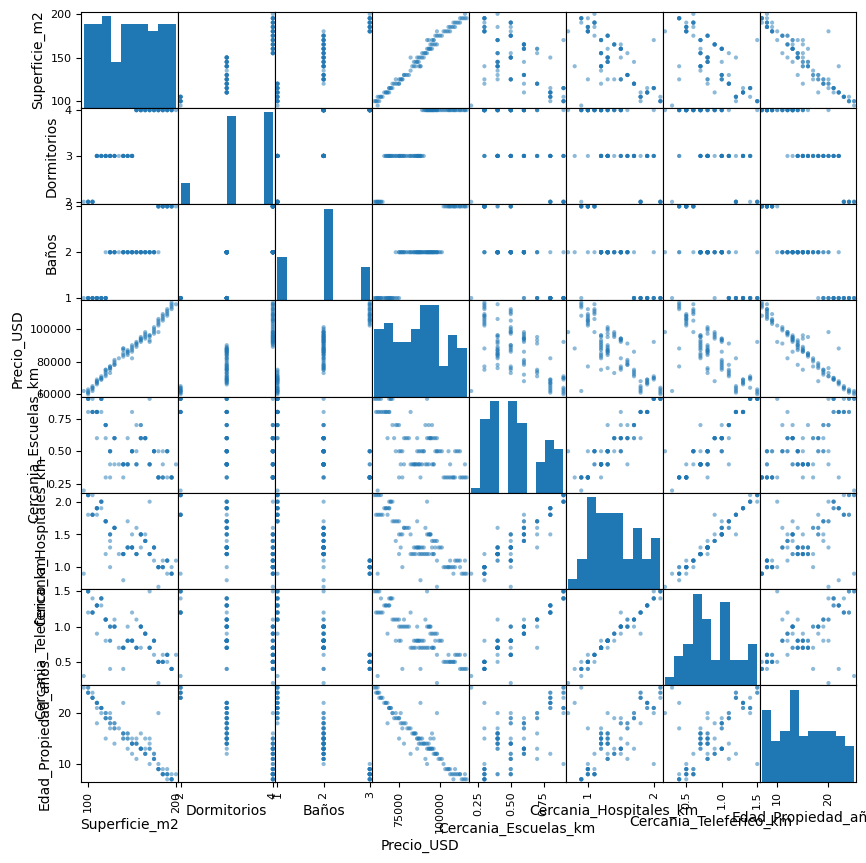

In [54]:
# Matriz de dispersión para ver relaciones entre todas las variables numéricas
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize=(10, 10))
plt.show()

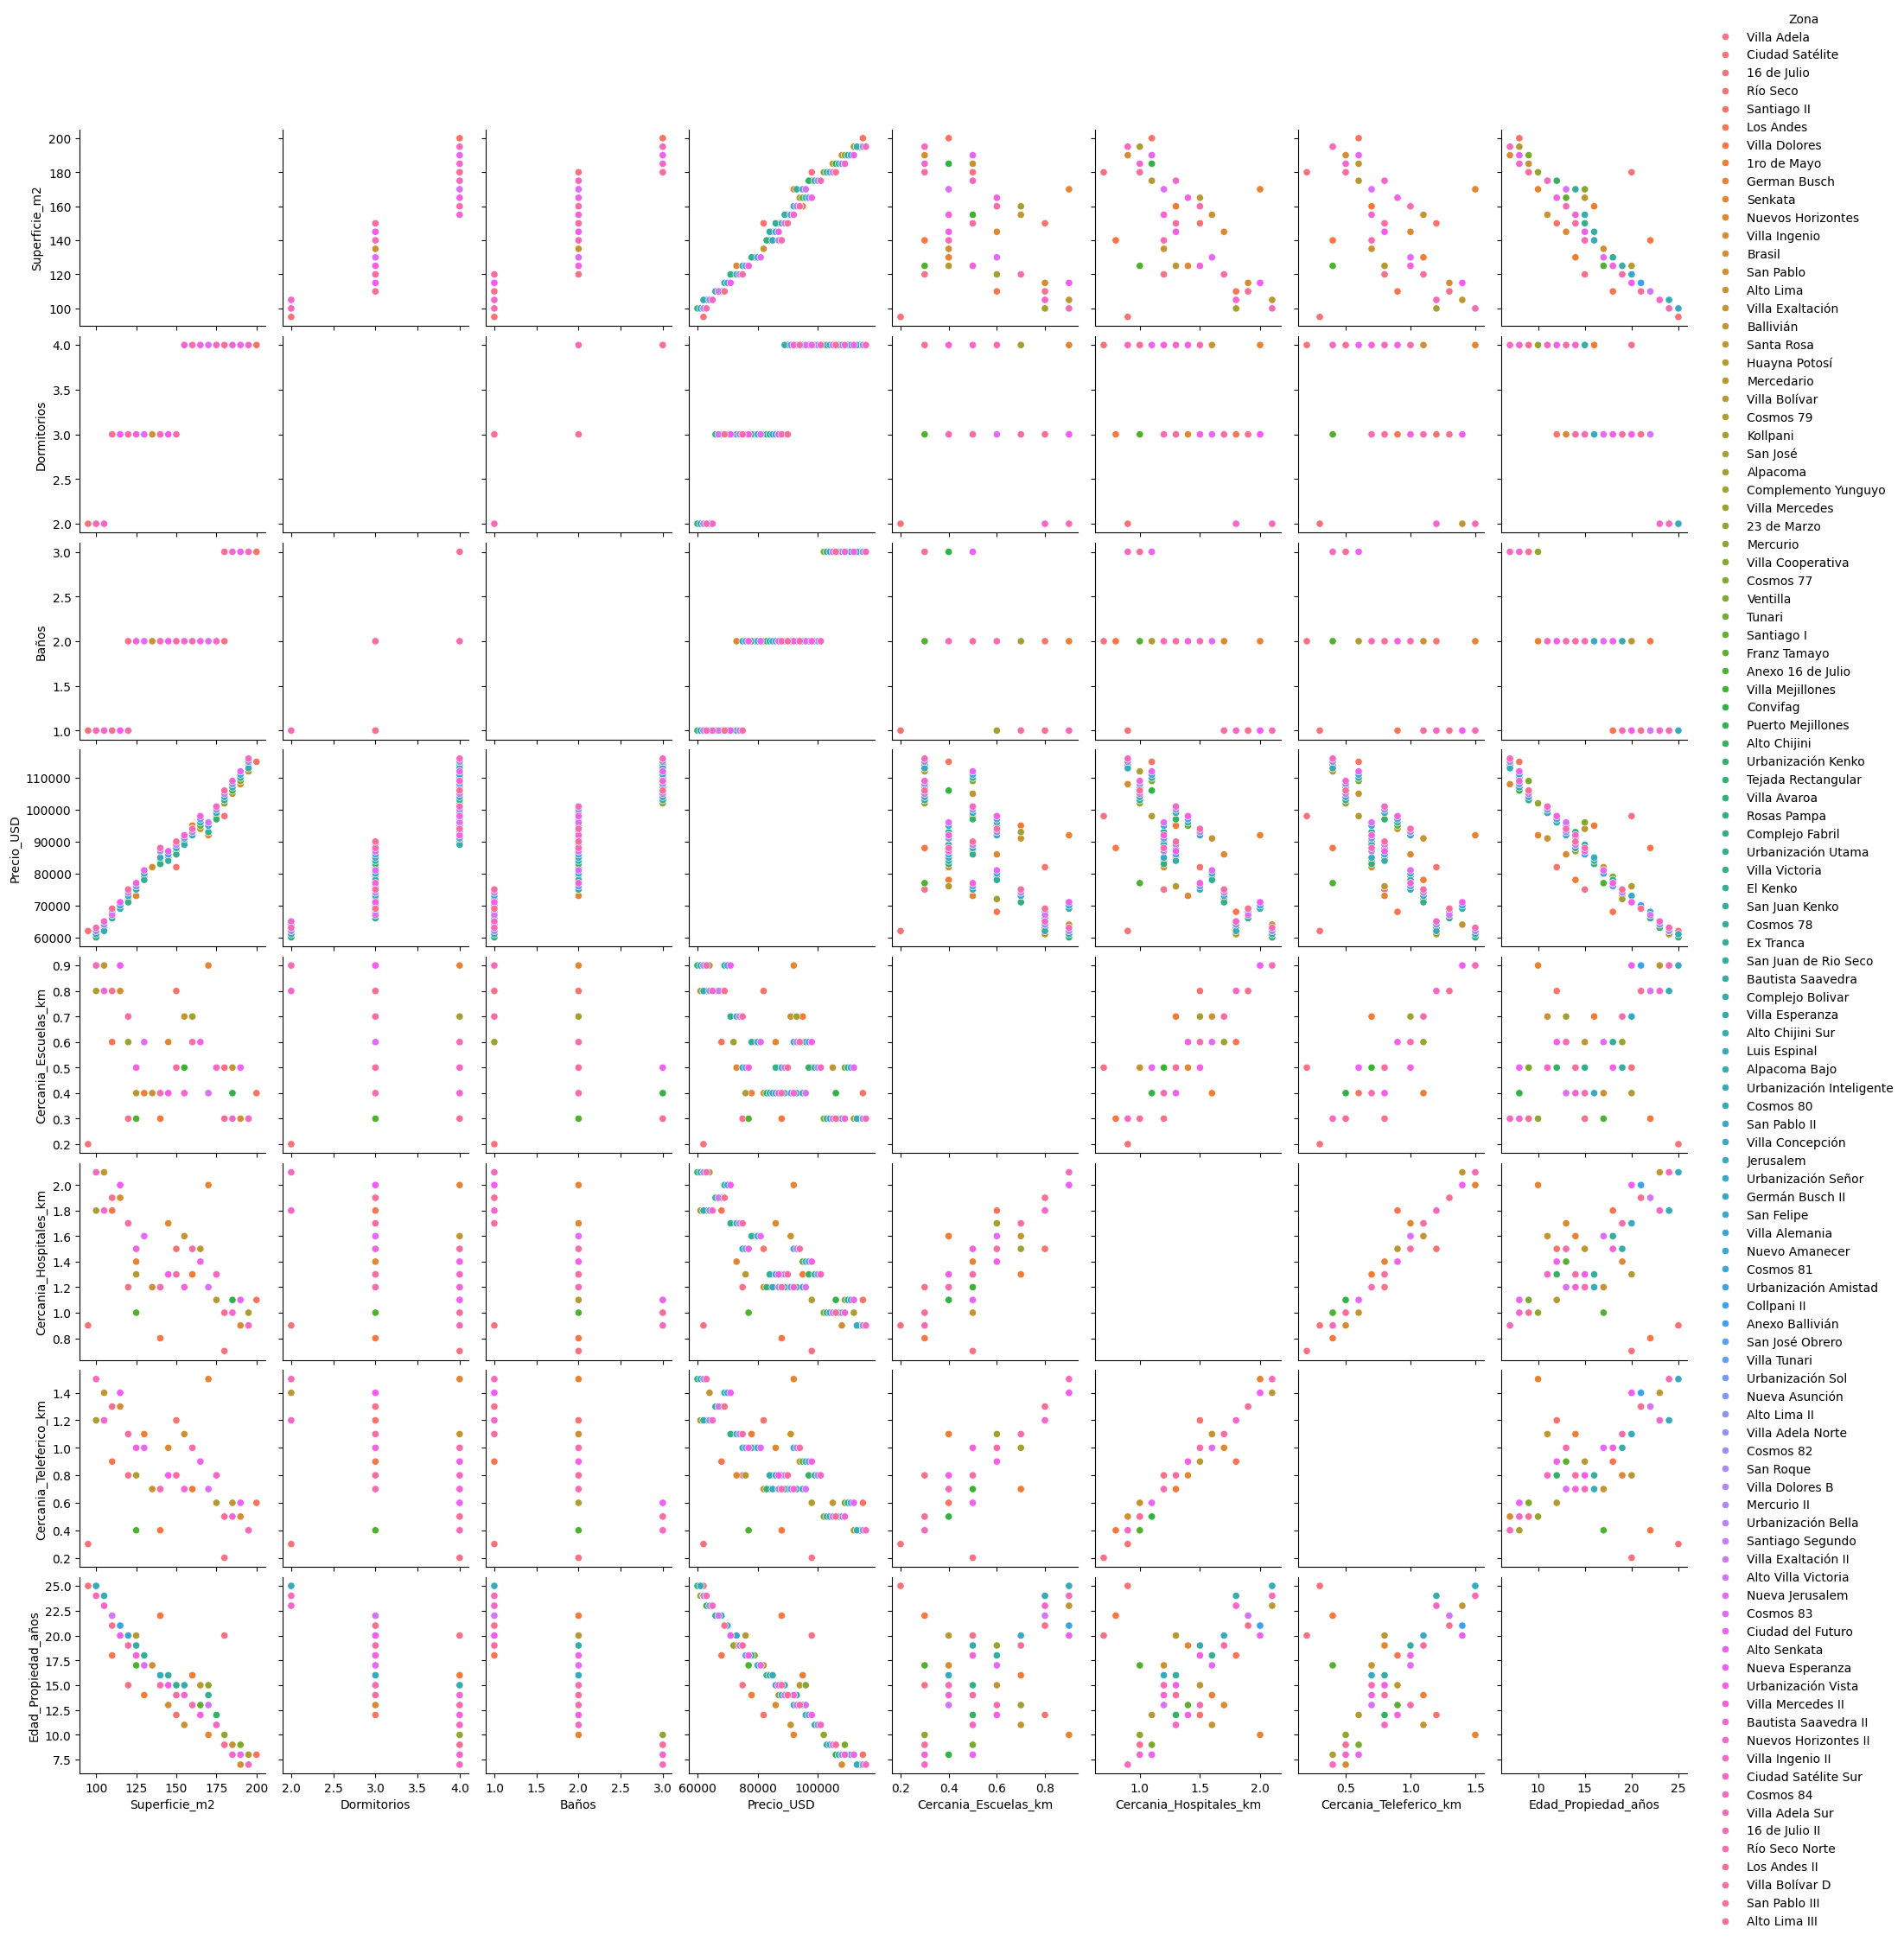

In [55]:
# Pairplot de seaborn para visualizar las relaciones entre variables, color por 'Zona'
sns.pairplot(dataset, hue='Zona', diag_kind='kde')
plt.show()

In [56]:
random.seed(42)
np.random.seed(42)

In [57]:
caracteristicas_relevantes = ['Superficie_m2', 'Dormitorios', 'Baños', 'Garaje',
                              'Cercania_Escuelas_km', 'Cercania_Hospitales_km',
                              'Cercania_Teleferico_km', 'Edad_Propiedad_años']
objetivo = 'Precio_USD'

In [58]:
df = dataset[caracteristicas_relevantes + [objetivo]].copy()

In [59]:
print(df.columns)

Index(['Superficie_m2', 'Dormitorios', 'Baños', 'Garaje',
       'Cercania_Escuelas_km', 'Cercania_Hospitales_km',
       'Cercania_Teleferico_km', 'Edad_Propiedad_años', 'Precio_USD'],
      dtype='object')


In [60]:
df['Garaje'] = df['Garaje'].map({'Si': 1, 'No': 0})  # Convertir Garaje en binario

In [61]:
# Dividir los datos en características (X) y objetivo (y)
X = df.drop(objetivo, axis=1)
y = df[objetivo]

In [62]:
# Función para dividir los datos en conjuntos de entrenamiento y prueba
def train_test_split(X, y, test_size=0.2):
    n = len(X)
    test_n = int(n * test_size)
    indices = list(range(n))
    random.shuffle(indices)
    test_indices = indices[:test_n]
    train_indices = indices[test_n:]
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

In [63]:
# Función para dividir los datos en conjuntos de entrenamiento y prueba
def train_test_split(X, y, test_size=0.2):
    n = len(X)
    test_n = int(n * test_size)
    indices = list(range(n))
    random.shuffle(indices)
    test_indices = indices[:test_n]
    train_indices = indices[test_n:]
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [64]:
# 2. Implementación del modelo
# Clase para Árbol de Decisión
class ArbolDecision:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth

    def dividir_nodo(self, X, y, profundidad):
        m = X.shape[1]
        if len(y) <= 3 or profundidad >= self.max_depth:
            return np.mean(y)

        # Seleccionar un subconjunto aleatorio de características (Paso 1)
        n_features = int(np.sqrt(m))  # Subconjunto aleatorio de características
        features = np.random.choice(m, n_features, replace=False)

        mejor_ganancia = 0
        mejor_pregunta = None
        mejor_izquierda = None
        mejor_derecha = None

        for col in features:
            valores_unicos = np.unique(X[:, col])
            for valor in valores_unicos:
                pregunta = (col, valor)
                izquierda, derecha = self.partir(X, y, pregunta)
                if len(izquierda[1]) > 0 and len(derecha[1]) > 0:
                    ganancia = self.ganancia_informacion(y, izquierda[1], derecha[1])
                    if ganancia > mejor_ganancia:
                        mejor_ganancia = ganancia
                        mejor_pregunta = pregunta
                        mejor_izquierda = izquierda
                        mejor_derecha = derecha

        if mejor_ganancia > 0:
            izquierda = self.dividir_nodo(mejor_izquierda[0], mejor_izquierda[1], profundidad + 1)
            derecha = self.dividir_nodo(mejor_derecha[0], mejor_derecha[1], profundidad + 1)
            return (mejor_pregunta, izquierda, derecha)

        return np.mean(y)

    def partir(self, X, y, pregunta):
        col, valor = pregunta
        mascara = X[:, col] >= valor
        return (X[~mascara], y[~mascara]), (X[mascara], y[mascara])

    def ganancia_informacion(self, padre, izquierda, derecha):
        p = len(izquierda) / len(padre)
        return self.varianza(padre) - p * self.varianza(izquierda) - (1 - p) * self.varianza(derecha)

    def varianza(self, y):
        if len(y) == 0:
            return 0
        return np.var(y)

    def ajustar(self, X, y):
        self.raiz = self.dividir_nodo(X.values, y.values, 0)

    def predecir_uno(self, x, nodo):
        if isinstance(nodo, tuple):
            pregunta, izquierda, derecha = nodo
            if x[pregunta[0]] >= pregunta[1]:
                return self.predecir_uno(x, derecha)
            else:
                return self.predecir_uno(x, izquierda)
        else:
            return nodo

    def predecir(self, X):
        return [self.predecir_uno(x, self.raiz) for x in X.values]

# Clase para Bosque Aleatorio
class BosqueAleatorio:
    def __init__(self, n_arboles=10, max_depth=5):
        self.n_arboles = n_arboles
        self.max_depth = max_depth
        self.arboles = []

    def ajustar(self, X, y):
        for _ in range(self.n_arboles):
            arbol = ArbolDecision(max_depth=self.max_depth)
            # Crear subconjuntos diferentes con Bootstrap Sampling (Paso 2)
            indices = np.random.choice(len(X), len(X), replace=True)
            X_muestra = X.iloc[indices]
            y_muestra = y.iloc[indices]
            arbol.ajustar(X_muestra, y_muestra)
            self.arboles.append(arbol)

    def predecir(self, X, clasificacion=False):
        predicciones = np.array([arbol.predecir(X) for arbol in self.arboles])
        if clasificacion:
            # Agregar votación para clasificación (Paso 3)
            from scipy.stats import mode
            return mode(predicciones, axis=0).mode[0]
        else:
            # Agregar promedio para regresión
            return np.mean(predicciones, axis=0)

In [65]:
# 3. Evaluación del modelo
modelo_rf = BosqueAleatorio(n_arboles=10, max_depth=5)
modelo_rf.ajustar(X_train, y_train)

y_pred = modelo_rf.predecir(X_test)

# Calcular métricas de evaluación
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f"Error Cuadrático Medio: {mse}")
print(f"Raíz del Error Cuadrático Medio: {rmse}")
print(f"Puntuación R-cuadrado: {r2}")

Error Cuadrático Medio: 6660990.562665166
Raíz del Error Cuadrático Medio: 2580.8894905952807
Puntuación R-cuadrado: 0.9561109093360923


In [66]:
# 4. Implementación del modelo
def predecir_precio(nuevos_datos):
    return modelo_rf.predecir(nuevos_datos)[0]

nueva_propiedad = pd.DataFrame({
    'Superficie_m2': [150],
    'Dormitorios': [3],
    'Baños': [2],
    'Garaje': [1],
    'Cercania_Escuelas_km': [0.7],
    'Cercania_Hospitales_km': [1.2],
    'Cercania_Teleferico_km': [0.8],
    'Edad_Propiedad_años': [10]
})

In [67]:
precio_predicho = predecir_precio(nueva_propiedad)
print(f"Precio Predicho: ${precio_predicho:.2f}")

Precio Predicho: $88297.16
